# tests

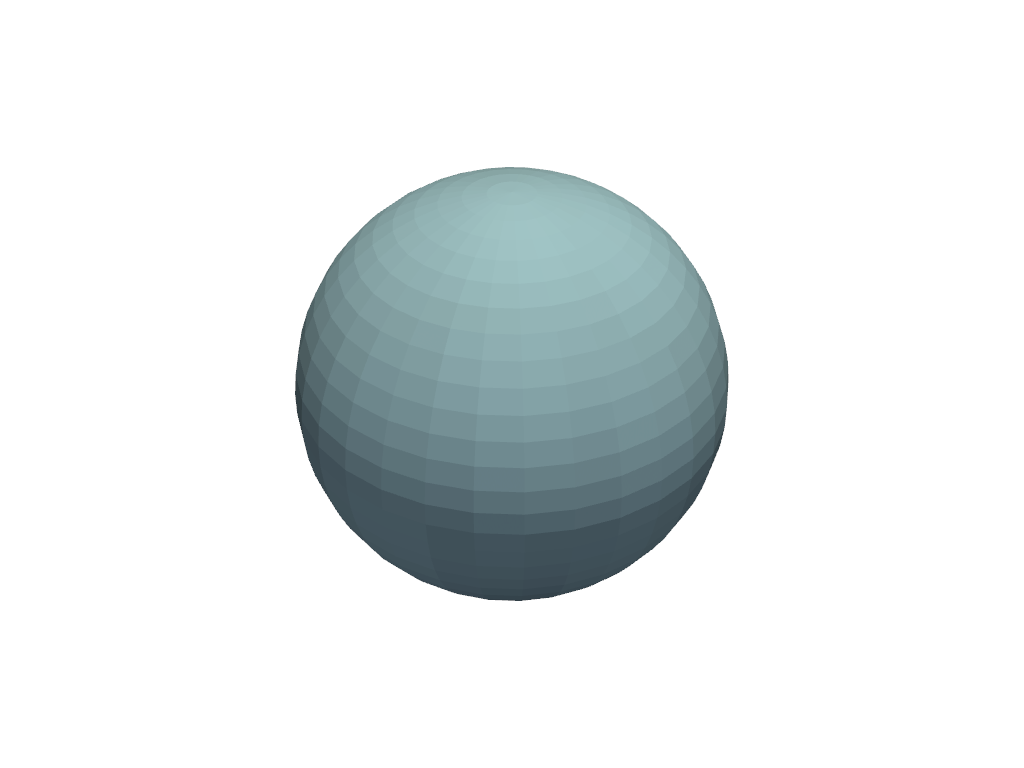

In [3]:
import pyvista as pv
import panel as pn

pn.extension('vtk')

# Exemple de rendu avec PyVista et Panel
mesh = pv.Sphere()
plotter = pv.Plotter()
plotter.add_mesh(mesh)
plotter.show(jupyter_backend='panel')

In [4]:
import pyvista as pv
from pyvista import examples

In [5]:
dataset = examples.download_lucy()
dataset.plot(smooth_shading=True, color="white")

Widget(value='<iframe src="http://localhost:63113/index.html?ui=P_0x14790c590_3&reconnect=auto" class="pyvista…

In [6]:
import random

from pyvista.plotting.colors import hexcolors
from pyvista.trame.ui import get_viewer
from trame.ui.vuetify3 import SinglePageLayout
from trame.widgets import vuetify3 as v3

plotter = pv.Plotter()
actor = plotter.add_mesh(dataset)
viewer = get_viewer(plotter)
view = None


def change_color() -> None:
    actor.prop.color = random.choice(list(hexcolors.keys()))  # noqa: S311
    view.update()


# Create UI
with SinglePageLayout(viewer.server) as layout:
    with layout.toolbar.clear() as tb:
        tb.density = "compact"
        tb.theme = "dark"
        viewer.ui_controls(mode="trame")
        v3.VBtn(icon="mdi-palette", click=change_color)
    with layout.content:
        view = viewer.ui(add_menu=False, mode="trame")


# Show UI
await layout.ready
layout

HTML(value='<iframe id="trame_trame__template_main" src="http://localhost:64003/index.html?ui=main&reconnect=a…